# Experiment 1 - Common use case, optimizing N threads

In [1]:
# Import packages
from __future__ import division, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%run '/home/mark/Desktop/Plastic-Parallel-Programming/data_analysis/year 2/utilities.ipynb'

Program parameters:

In [2]:
folder_path1    = 'results/tuning/'
number_of_tests = 24

Set files to read

In [3]:
file_names = []

for i in range(1, number_of_tests + 1): 
    file_names.append("test" + str(i) + "/output")

Import the dataset

In [4]:
data = []
        
fetch_data(folder_path1, file_names, data, ["Runtime"])
        
dataset = []

num_workers_min = 1
num_workers_step = 1
num_workers_max = 24
num_workers_values = range(num_workers_min, num_workers_max + num_workers_step, num_workers_step)
nwv_len = len(num_workers_values)
num_workers = num_workers_values[0]

kernel_repeats_min = 1
kernel_repeats_step = 1
kernel_repeats_max = 10
kernel_repeats_values = range(kernel_repeats_min, kernel_repeats_max + kernel_repeats_step, kernel_repeats_step)
kr_len = len(kernel_repeats_values)
kernel_repeats = kernel_repeats_values[0]

# kernel_min = 0
# kernel_max = 1
# kernel_step = 1
# kernel_values = ["cpu", "vm"]
# k_len = len(kernel_values)
# kernel = kernel_values[0]

for i in range(len(data)):
    num_workers = num_workers_values[i % nwv_len]
    kernel_repeats = kernel_repeats_values[(i // nwv_len) % kr_len]
    kernel = "vm" # kernel_values[((i // nwv_len) // kr_len) % k_len]
    dataset.append([32, kernel, kernel_repeats, num_workers, data[i][1:].mean()[0]])

dataset = pd.DataFrame(dataset)
dataset.columns = ["Grid Size", "Kernel", "Kernel Repeats", "Num Workers", "Time"]

# dataset = dataset.loc[dataset["Kernel Repeats"].isin(range(0, 110, 10))]

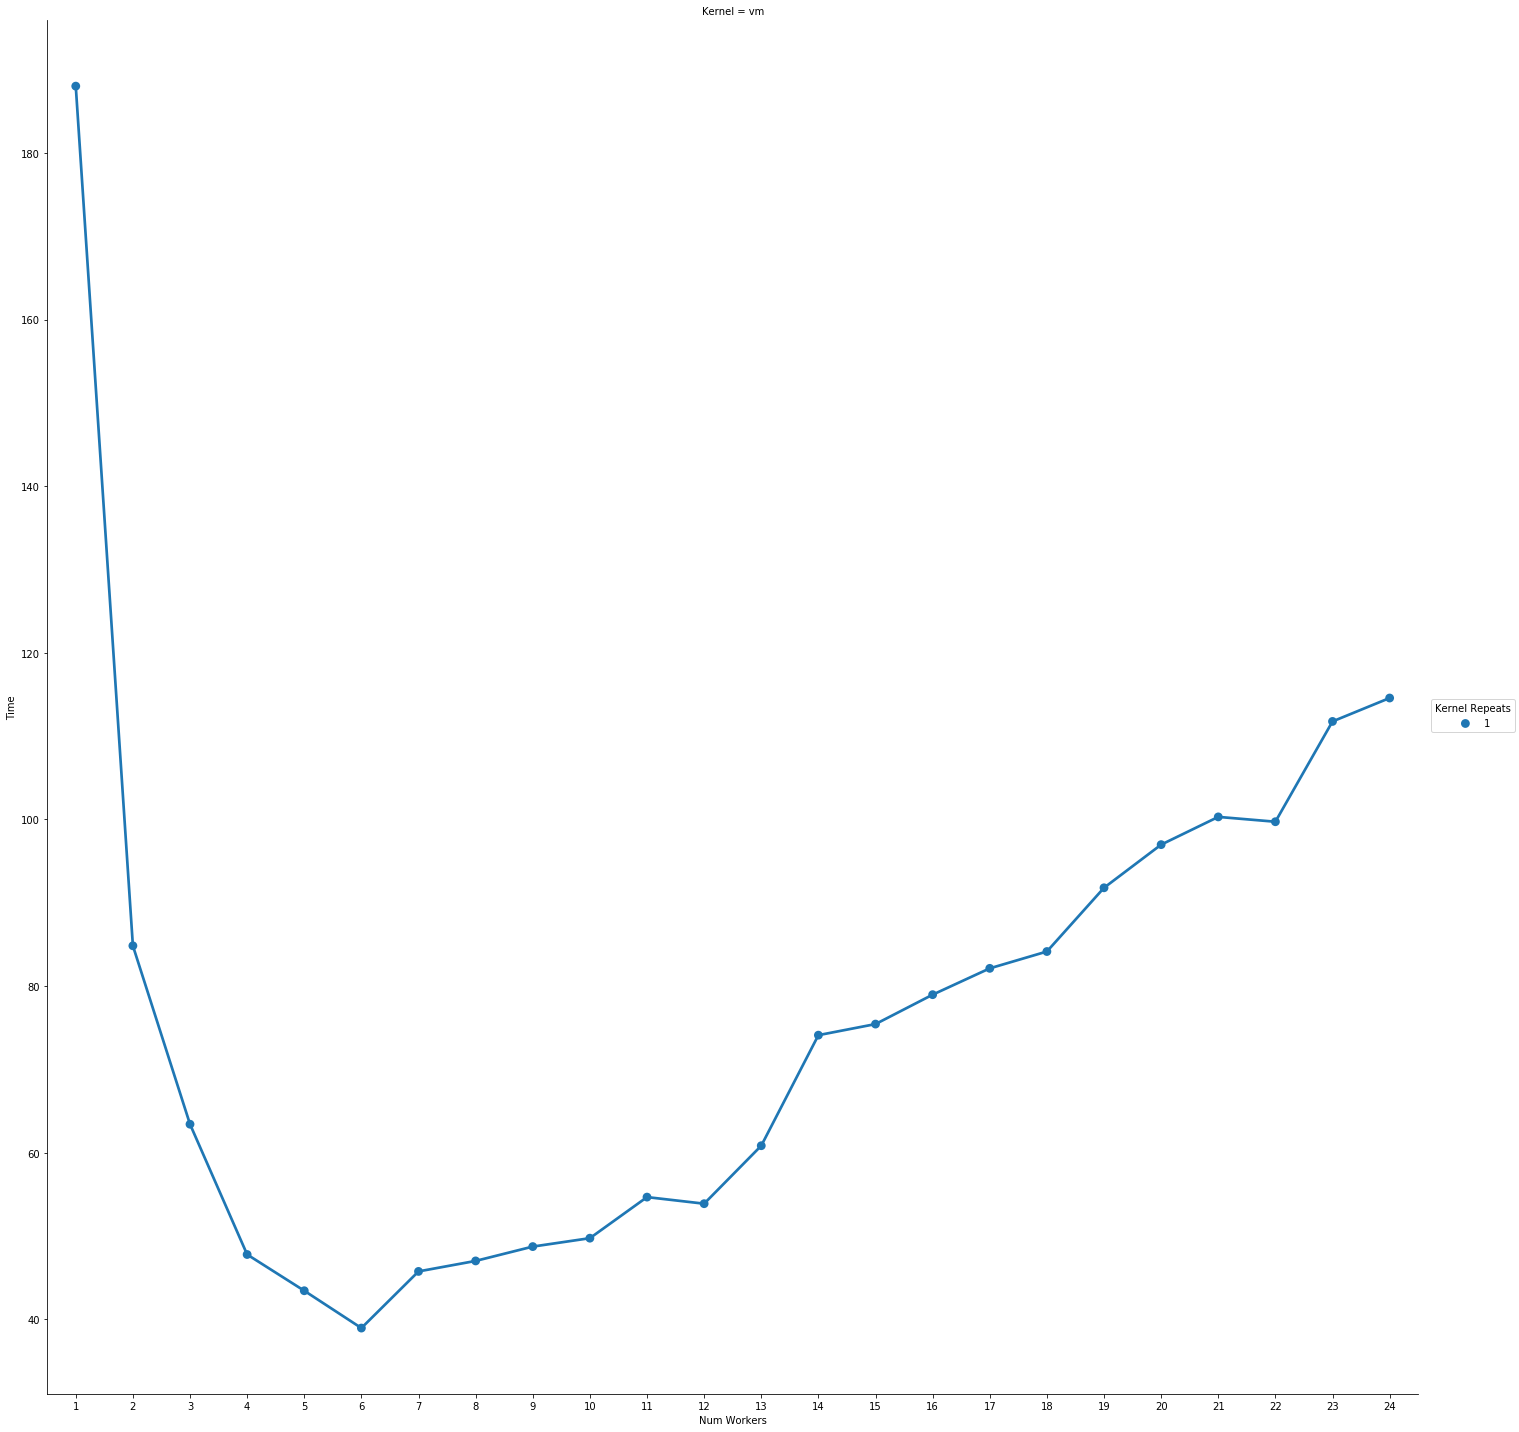

In [5]:
sns.factorplot(x="Num Workers", y="Time",
               hue="Kernel Repeats",
               col="Kernel",
               data=dataset, size=20);

plt.savefig("graphs/tuning/tuning.png")
plt.show()

### 